# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people and understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: EDA: Reading and Understand the Data

In [376]:
# import necessary libraries / packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [377]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Quality Checks

In [378]:
bike.shape

(730, 16)

In [379]:
bike.info() # no null values in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [380]:
bike[bike.duplicated()] # no duplicate records in the data set

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


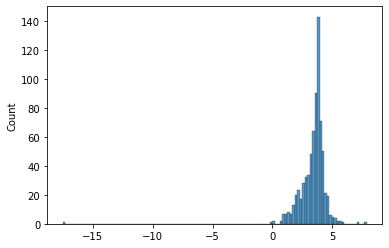

In [381]:
sns.histplot(data=bike,x=bike.atemp - bike.temp)
plt.show()

**Insights**
- **difference between feeling temperature and temperature ranges from 0 to 5 in majority.**
- **no gegative differene - its obivious feeling temperature is never less than temperature.**

In [382]:
bike[(bike.casual + bike.registered) != bike.cnt] # its confirmed that 'cnt' is the total of 'casual' and 'registered'

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [383]:
bike[(bike.holiday == 1)].shape

(21, 16)

In [384]:
bike[(bike.workingday == 0)].shape

(226, 16)

In [385]:
bike[(bike.holiday == 1) & (bike.workingday == 0)].shape

(21, 16)

**holiday can be dropped becasue 'workingday' varaible contains holiday data**

In [386]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**It seems follwoing features variables are categorical that can be created dummy variables.**

In [387]:
bike['season'].unique() # (1:spring, 2:summer, 3:fall, 4:winter)

array([1, 2, 3, 4], dtype=int64)

In [388]:
bike['mnth'].unique() # month ( 1 to 12) 1:January - 12:December

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [389]:
bike['weekday'].unique() # day of the week - 1:Monday - 0:Sunday

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [390]:
bike['weathersit'].unique()

#weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

array([2, 1, 3], dtype=int64)

**Following variables can be dropped.**

- **instant:** as it is record index
- **dteday:** as it is duplicate variable , data already has days, months and years in separate columns
- **casual:** it is count of casual users and target varaible is 'cnt' so lienar regression should not > 1 target varaible'
- **registered:** it is count of registered users and target varaible is 'cnt' so lienar regression should not > 1 target varaible'
- **temp:** we can use either temp or atemp i.e. feeling temperature so for dropping one of them and decided to drop 'temp' that more predictor because it gives info on how hot it really feels for a human.

### Data Cleaning

In [391]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [392]:
# drop listed varaibles.
var_drop = ['instant','dteday','temp','casual','registered','holiday']

bike_ad = bike.drop(var_drop,axis=1)

In [393]:
bike_ad.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,11.46350,43.6957,12.522300,1600


In [394]:
# assign categorical names to numbers for categorical variables

In [395]:
bike_ad['season'] =  bike_ad['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [396]:
bike_ad['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [397]:
bike_ad['mnth'] =  bike_ad['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',
                                       9:'sept',10:'oct',11:'nov',12:'dec'})

In [398]:
bike_ad['mnth'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept',
       'oct', 'nov', 'dec'], dtype=object)

In [399]:
bike_ad['weekday'] =  bike_ad['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',
                                              6:'sat'})

In [400]:
bike_ad['weekday'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)

In [401]:
bike_ad['weathersit'] =  bike_ad['weathersit'].map({1:'clear',2:'mist_cloudy',3:'light_snow'})

In [402]:
bike_ad['weathersit'].unique()

array(['mist_cloudy', 'clear', 'light_snow'], dtype=object)

In [403]:
bike_ad.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,mon,1,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,tue,1,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,wed,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,thu,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,fri,1,clear,11.46350,43.6957,12.522300,1600


### Data Visualization 
to see correlation between independent varaibles and dependent varaible

**Visualize association among numeric variables**

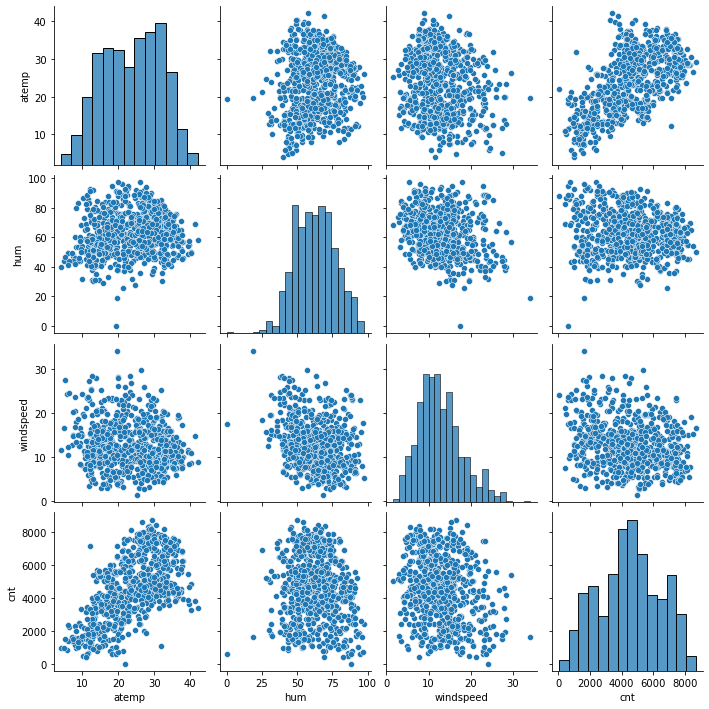

In [404]:
num_vars = ['atemp','hum','windspeed','cnt']
sns.pairplot(data=bike_ad[num_vars])
plt.show()

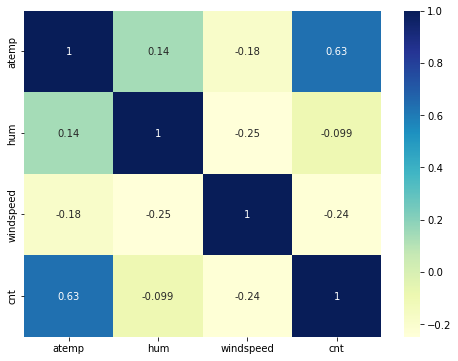

In [405]:
plt.figure(figsize=(8,6))
sns.heatmap(data=bike_ad[num_vars].corr(),annot=True,cmap='YlGnBu')
plt.show()

**Insights:**
- **there is good positive association between "feeling temperature" and "count of rental bikes".**

- **there is somewhat negative association between "wind speed" and "count of rental bikes".**

**Visualize association for categorical variables**

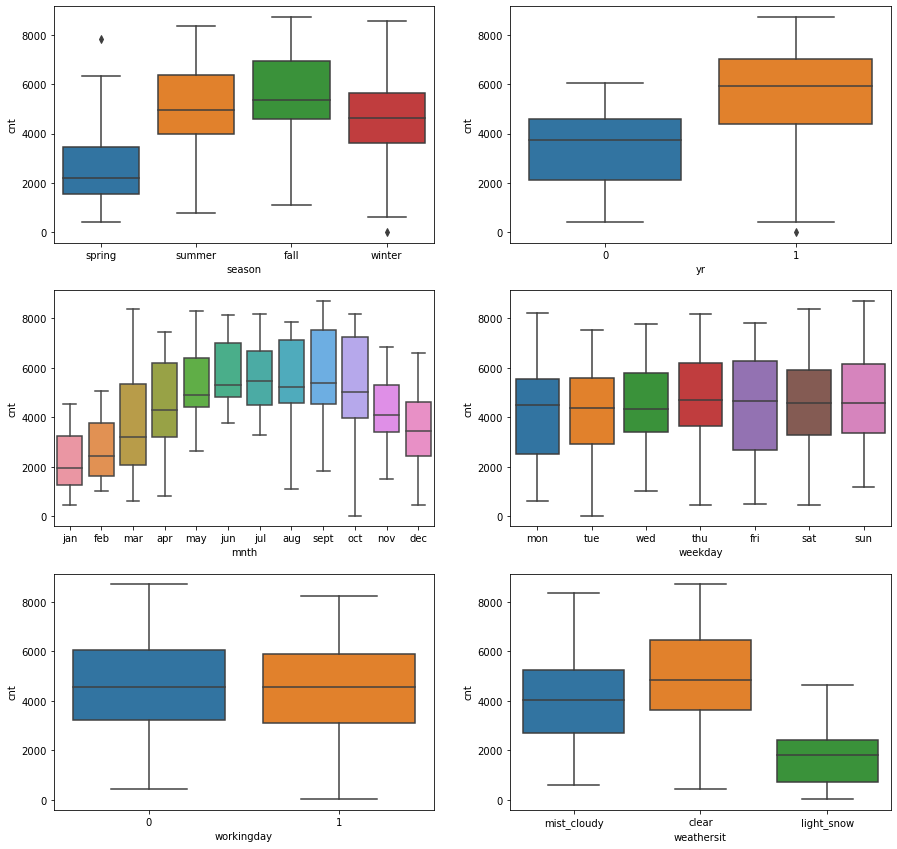

In [406]:
cat_vars = ['season','yr','mnth','weekday','workingday','weathersit']

plt.figure(figsize=(15,20))
for i in range(len(cat_vars)):
    
    plt.subplot(4,2,1+i)
    sns.boxplot(x=cat_vars[i],y='cnt',data=bike_ad)

**Insights**
- **user tends to rent bikes more in summer and fall than other season**

- **there is increasing trend of renting bikes from january to july and decreasing trend from july to december**

- **throughout the week, daily bike renting count is same**

- **user tend to rent bike in clear sky more compare to light snow**

## Step 2: Data Preparation for Modeling

In [407]:
bike_ad.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,mon,1,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,tue,1,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,wed,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,thu,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,fri,1,clear,11.46350,43.6957,12.522300,1600


### Encoding

**Convert categorical variable to dummy variables.**

**Why?**
-  Regression analysis treats all independent variables in the analysis as numerical either interval or ratio scale variables whose values are directly comparable
- However nominal scale variable values are not directly comparable, so we do create dummy varaibles

In [408]:
# season
season = pd.get_dummies(bike_ad['season'],drop_first=True)
bike_ad = pd.concat([bike_ad,season],axis=1)

In [409]:
# mnth
mnth = pd.get_dummies(bike_ad['mnth'],drop_first=True)
bike_ad = pd.concat([bike_ad,mnth],axis=1)

In [410]:
# weekday
weekday = pd.get_dummies(bike_ad['weekday'],drop_first=True)
bike_ad = pd.concat([bike_ad,weekday],axis=1)

In [411]:
# weathersit
weathersit = pd.get_dummies(bike_ad['weathersit'],drop_first=True)
bike_ad = pd.concat([bike_ad,weathersit],axis=1)

In [413]:
bike_ad.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
0,spring,0,jan,mon,1,mist_cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,tue,1,mist_cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,wed,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,thu,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,fri,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
bike_ad.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)

In [415]:
bike_ad.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
0,0,1,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [416]:
bike_ad.shape

(730, 28)

### Train Test Split

In [417]:
import sklearn
from sklearn.model_selection import train_test_split

In [418]:
df_train,df_test = train_test_split(bike_ad,train_size=0.7,random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


### Re-scaling

**Variables that are measured at different scales do not contribute equally to the model fitting.**

In [245]:
pd.set_option('display.max_columns',None)

In [246]:
bike_ad.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Min-Max scaling (normalization) between 0 and 1 [(x - xmin) / (xmax - xmin)]**

-  StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers
-  StandardScaler is useful for the features that follow a Normal distribution.Therefore, it makes mean = 0 and scales the data to unit variance.

**from pair-plot and box plot, we saw feature varaibles are not perfect normaaly distributed and having outliers so minmax scaler for this case is good method to use**

In [419]:
from sklearn.preprocessing import MinMaxScaler

In [420]:
scalar = MinMaxScaler()

# numeric contineous variable list
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

df_train.head()


,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
576,1,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [421]:
df_train.shape

(510, 28)

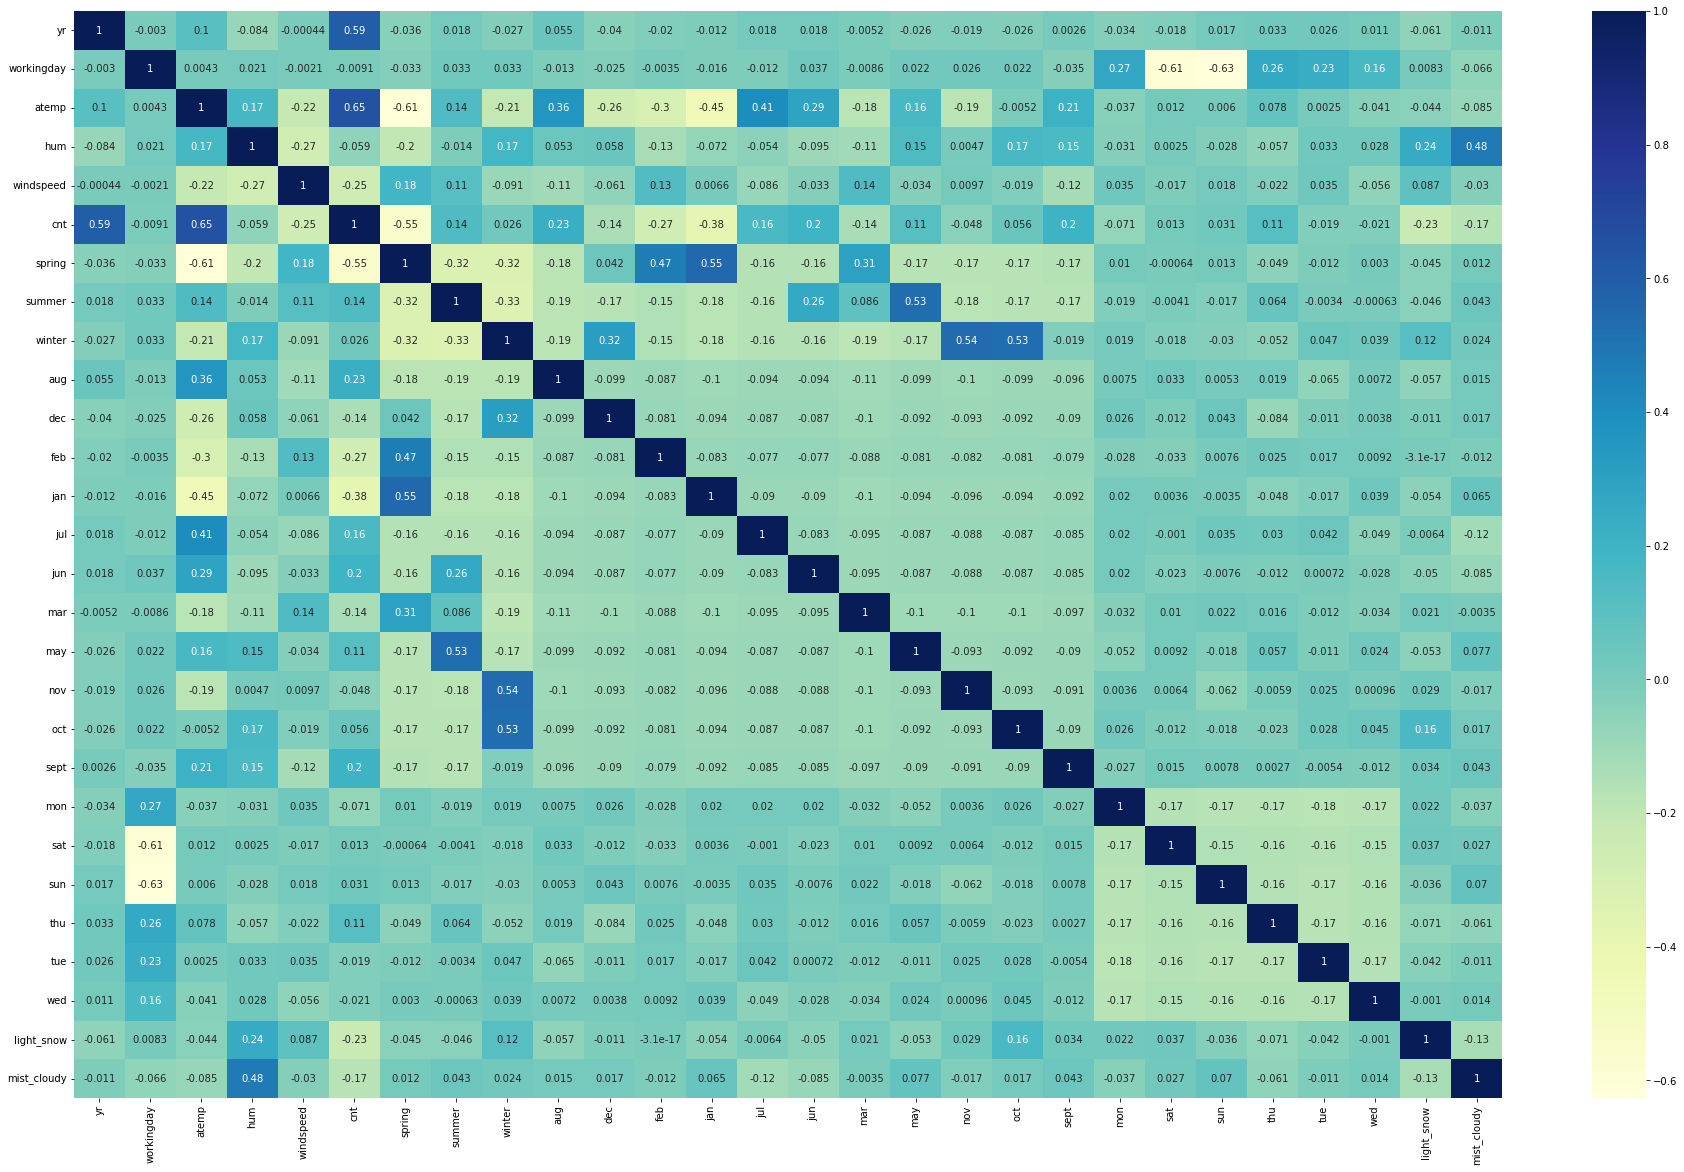

In [422]:
plt.figure(figsize=(32,20))

sns.heatmap(data=df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

## Step 3: Training the Model

### Divide the data into X_train and y_train for the model building

In [423]:
y_train = df_train.pop('cnt')
X_train = df_train

### Feature Selection using RFE  
**balanced approach: automatic selection of feature + manual dropping insignificant features**

In [424]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

rfe = RFE(lm,15)

rfe = rfe.fit(X_train,y_train)

In [425]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 2),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 10),
 ('jun', False, 6),
 ('mar', False, 13),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sept', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 7),
 ('wed', False, 9),
 ('light_snow', True, 1),
 ('mist_cloudy', True, 1)]

In [426]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'aug', 'feb', 'jan', 'sept', 'sat', 'sun', 'light_snow', 'mist_cloudy'],
      dtype='object')

### Building a model using statsmodel.api

#### Model 1

In [427]:
import statsmodels.api as sm

In [434]:
X_train_mdl_1 = X_train[col]

X_train_mdl_1 = sm.add_constant(X_train_mdl_1)

lm = sm.OLS(y_train,X_train_mdl_1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          1.28e-184
Time:                        12:27:51   Log-Likelihood:                 504.16
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     494   BIC:                            -908.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1774      0.041      4.278      

##### VIF

In [430]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [435]:
X_train_mdl_1.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'feb', 'jan', 'sept', 'sat', 'sun', 'light_snow',
       'mist_cloudy'],
      dtype='object')

In [436]:
X_train_mdl_1 = X_train_mdl_1.drop('const',axis=1)

In [437]:
vif = pd.DataFrame()

X = X_train_mdl_1

vif['Feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
3,hum,29.14
1,workingday,18.90
2,atemp,14.34
4,windspeed,4.58
12,sun,4.34
11,sat,4.15
6,winter,2.48
14,mist_cloudy,2.26
5,summer,2.24
0,yr,2.07


#### Model 2

In [438]:
# lets drop "feb" variable having high p-value - 0.153 > 0.05

X_train_mdl_2 = X_train_mdl_1.drop(['feb'],axis=1)

In [439]:
X_train_mdl_2 = sm.add_constant(X_train_mdl_2)

lm = sm.OLS(y_train,X_train_mdl_2).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          2.58e-185
Time:                        12:32:06   Log-Likelihood:                 503.10
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     495   BIC:                            -912.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1603      0.040      4.032      

##### VIF

In [440]:
X_train_mdl_2 = X_train_mdl_2.drop('const',axis=1)

In [441]:
vif = pd.DataFrame()

X = X_train_mdl_2

vif['Feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
3,hum,27.67
1,workingday,18.19
2,atemp,12.43
4,windspeed,4.49
11,sun,4.21
10,sat,4.04
13,mist_cloudy,2.25
0,yr,2.06
6,winter,2.05
5,summer,1.97


#### Model 3

In [442]:
# lets drop "hum" variable having high VIF - 27.67 > 5

X_train_mdl_3 = X_train_mdl_2.drop(['hum'],axis=1)

In [443]:
X_train_mdl_3 = sm.add_constant(X_train_mdl_3)

lm = sm.OLS(y_train,X_train_mdl_3).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          2.08e-182
Time:                        12:37:14   Log-Likelihood:                 493.44
No. Observations:                 510   AIC:                            -958.9
Df Residuals:                     496   BIC:                            -899.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0653      0.034      1.926      

##### VIF

In [444]:
X_train_mdl_3 = X_train_mdl_3.drop('const',axis=1)

In [445]:
vif = pd.DataFrame()

X = X_train_mdl_3

vif['Feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
1,workingday,12.15
2,atemp,10.09
3,windspeed,4.48
10,sun,3.18
9,sat,3.03
0,yr,2.05
4,summer,1.96
5,winter,1.85
12,mist_cloudy,1.60
6,aug,1.56


#### Model 4

In [451]:
# lets drop "workingday" variable having high VIF - 12.15 > 5

X_train_mdl_4 = X_train_mdl_3.drop(['workingday'],axis=1)

In [452]:
X_train_mdl_4 = sm.add_constant(X_train_mdl_4)

lm = sm.OLS(y_train,X_train_mdl_4).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.7
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          8.84e-182
Time:                        12:58:52   Log-Likelihood:                 489.19
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     497   BIC:                            -897.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1440      0.020      7.102      

##### VIF

In [453]:
vif = pd.DataFrame()

X = X_train_mdl_4

vif['Feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by='VIF',ascending=False)

vif

,Feature,VIF
0,const,23.78
2,atemp,1.80
7,jan,1.54
5,winter,1.49
4,summer,1.48
6,aug,1.41
8,sept,1.20
3,windspeed,1.12
12,mist_cloudy,1.06
11,light_snow,1.05


**Model Interpretation**

- **atemp: demand of shared bikes will increase by 0.51 if feeling temperature increases by 1 unit**

- **light_snow: demand of sahred bikes decreases by -0.27 if  light snow increases by 1 unit**

- **windspeed: demand of shared bikes decreases by -0.14 if wind spead increases by 1 unit**

## Step 4: Residual Analysis

### Residual Analysis

In [454]:
# generate y_train_pred values from model

y_train_pred = lm.predict(X_train_mdl_4)

y_train_pred.head()

576    0.731809
426    0.510734
728    0.385986
482    0.589889
111    0.290482
dtype: float64

In [455]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [456]:
res = y_train - y_train_pred

res.head()

576    0.095848
426   -0.045478
728   -0.181890
482   -0.106916
111   -0.099386
dtype: float64

### Linear Regression Model Assumptions Validation

##### 1.Error Terms are normally distributed

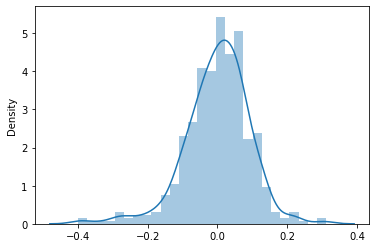

In [479]:
sns.distplot(res) 
plt.show()

In [480]:
res.mean()

-2.0005783522167037e-16

###### Yes, error terms are normally distributed and mean of the Error Terms is 0

##### 2.Homoscedasticity

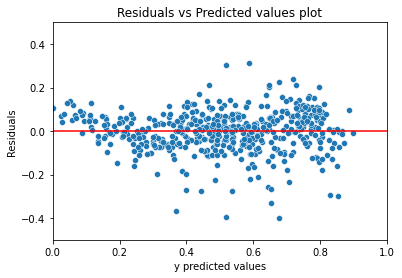

In [494]:
sns.scatterplot(y_train_pred,res)
plt.xlabel('y predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
sns.lineplot([0,1],[0,0],color='red')
plt.title('Residuals vs Predicted values plot')
plt.show()

##### Yes, There is no pattern in the distribution

##### 3.Linear Relationship

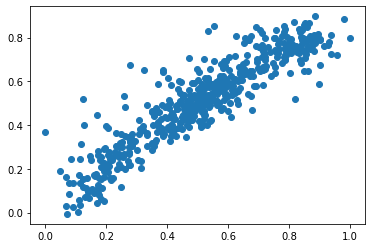

In [458]:
plt.scatter(y_train,y_train_pred)
plt.show()

##### 4.Little or No autocorrelation in the residuals

**Durbin Watson test: includes statistics, and it is equal to 2*(1-r), where r is autocorrelation between residual.**

- **When test statistic equals 2 then no autocorrelation.**
- **When closer to 0 then evidence of positive correlation.**
- **when closer to 4 then evidence of negative correlation.**

In [491]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

In [492]:
durbin_watson(lm.resid)

2.0098499662168203

##### The model is with no auto correlation as test statistics comes as near to 2

##### 5. Little or no Multicollinearity between the features

In [495]:
X_train_mdl_4.head()

,yr,atemp,windspeed,summer,winter,aug,jan,sept,sat,sun,light_snow,mist_cloudy
576,1,0.766351,0.264686,0,0,0,0,0,0,0,0,0
426,1,0.438975,0.255342,0,0,0,0,0,0,1,0,1
728,1,0.200348,0.663106,0,0,0,0,0,0,0,0,0
482,1,0.391735,0.188475,1,0,0,0,0,0,1,0,1
111,0,0.318819,0.380981,1,0,0,0,0,0,1,0,1


In [497]:
vif

,Feature,VIF
0,const,23.78
2,atemp,1.80
7,jan,1.54
5,winter,1.49
4,summer,1.48
6,aug,1.41
8,sept,1.20
3,windspeed,1.12
12,mist_cloudy,1.06
11,light_snow,1.05


##### VIF value of all variables is less than 5 shows very little multicollinearity 

## Step 5: Model Test and Evaluation

In [459]:
df_test.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
184,0,0,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,1,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Re-Scaling : MinMaxScaling

In [460]:
# numeric contineous variable list
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scalar.transform(df_test[num_vars])

df_test.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
184,0,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [461]:
df_test.describe()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,light_snow,mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.640909,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.480828,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Making Prediction

In [462]:
y_test = df_test.pop('cnt')
X_test = df_test

In [463]:
X_train_mdl_4.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'summer', 'winter', 'aug', 'jan',
       'sept', 'sat', 'sun', 'light_snow', 'mist_cloudy'],
      dtype='object')

In [464]:
X_train_mdl_4.drop('const',axis=1,inplace=True)

In [465]:
X_test_sm = X_test[X_train_mdl_4.columns]

X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,atemp,windspeed,summer,winter,aug,jan,sept,sat,sun,light_snow,mist_cloudy
184,1.0,0,0.769660,0.084219,0,0,0,0,0,0,0,0,1
535,1.0,1,0.842587,0.153728,1,0,0,0,0,0,0,0,0
299,1.0,0,0.496145,0.334206,0,1,0,0,0,1,0,0,1
221,1.0,0,0.795343,0.339570,0,0,1,0,0,0,0,0,0
152,1.0,0,0.741471,0.537414,1,0,0,0,0,1,0,0,0


In [466]:
y_test_pred = lm.predict(X_test_sm)
y_test_pred.head()

184    0.443295
535    0.880276
299    0.409569
221    0.567248
152    0.561181
dtype: float64

### Model Evaluation

#### Plotting Actual Vs. Predicted

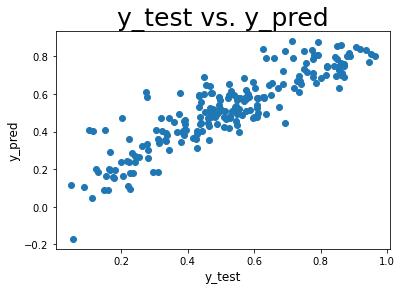

In [467]:
plt.scatter(y_test,y_test_pred)
plt.title("y_test vs. y_pred",fontsize=25)             
plt.xlabel('y_test',fontsize=12)                         
plt.ylabel('y_pred',fontsize=12)                      
plt.show()

#### R2 Score Comparison

In [468]:
from sklearn.metrics import r2_score

##### Train R2

In [469]:
round(r2_score(y_true=y_train,y_pred=y_train_pred),2)

0.83

##### Test R2

In [470]:
round(r2_score(y_true=y_test,y_pred=y_test_pred),2)

0.79

#### Adjusted R2 Score Comparison

##### Train Adjusted R2

In [471]:
round(1-(1-r2_score(y_true=y_train,y_pred=y_train_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),3)

0.819

##### Test Adjusted R2

In [472]:
round(1-(1-r2_score(y_true=y_test,y_pred=y_test_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)

0.764

**R^2 for training data set (0.83) and testing data set (0.79) depicts that the model is good fit**

**Adjusted R^2 (0.81) less than R^2 says adding adding additional predictors does not improve a regression model.**

**difference between trained model and tested model is < 5 shows a good fit model** 